In [ ]:
import numpy as np
import pandas as pd

In [ ]:
books = pd.read_csv('https://drive.google.com/file/d/1sW-qwCDXSUtQ3qL3Si6yM7QPorP3HXDi/edit')

print(books.head())
print(books.shape)
print(books.dtypes)
books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']




550 books

Пропусков нет

Non Fiction' 'Fiction'

In [ ]:
print(books.isna().sum())

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [ ]:
print(books['genre'].unique())

['Non Fiction' 'Fiction']

In [ ]:
price = books['price']
print(price.min(), price.max(), price.mean(), price.median())

0 105 13.1 11.0

**Поиск и сортировка данных**

In [ ]:
print(books['user_rating'].max())
print(books[books['user_rating'] == 4.9].shape)
print(books['reviews'].max())

Какой рейтинг в датасете наивысший? Ответ:4.9
Сколько книг имеют такой рейтинг? Ответ: 52
У какой книги больше всего отзывов? Ответ:Where the Crawdads Sing

In [ ]:
top_2015 = books.loc[books['year'] == 2015]
print(top_2015.loc[top_2015['price'] == top_2015['price'].max()])

Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)? Ответ:
Publication Manual of the American Psychologic

In [ ]:
top_2010 = books[books['year'] == 2010]
top_2010 = top_2010[top_2010['genre'] == 'Fiction'].count

Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? Ответ:
20

In [ ]:
top_2011 = books[books['user_rating'] == 4.9].isin({'year': [2010, 2011]})

Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? Ответ: 1


In [ ]:
print(top_2015.loc[top_2015['price'] < 8].sort_values(by = ['price']))

Какая книга последняя в отсортированном списке? Ответ: 253 Old School (Diary of a Wimpy Kid #10) Jeff Kinney 4.8 6169 7 2015 Fiction

**Агрегирование данных и соединения таблиц**

In [ ]:
books_gr = books.groupby('genre')
print(books_gr['price'].agg(['max', 'min']))

books_au = books.groupby('author')
count_list = (books_au['name'].agg('count'))
print(type(count_list))
print(count_list)
print(count_list[count_list == 12])
#print(books_au['name'].agg('count').sort_values(by = ['count']))


books_rt = books.groupby('author')
rating_list = (books_rt['user_rating'].agg('mean'))
print(rating_list.min())
print(rating_list[rating_list == rating_list.min()])

mer = pd.concat([count_list, rating_list], axis=1)
print(mer)
print(mer.sort_values(['name', 'user_rating']))

Максимальная цена для жанра Fiction: 82
Минимальная цена для жанра Fiction: 0
Максимальная цена для жанра Non Fiction: 105
Минимальная цена для жанра Non Fiction: 0


Какой размерности вышла таблица? Ответ: (248,)
У какого автора больше всего книг? Ответ: Jeff Kinney
Сколько книг у этого автора? Ответ:12

У какого автора средний рейтинг минимальный? Ответ:Donna Tartt
Какой у этого автора средний рейтинг? Ответ:3.9
Какой автор первый в списке? Ответ: Muriel Barbery 1 4.000000

In [ ]:
plt.pie(books.loc[1:10, 'reviews'], labels = books.loc[1:10, 'author'],shadow = True, pctdistance=1.2, labeldistance= 1.3, autopct="%.2f%%")
plt.show()

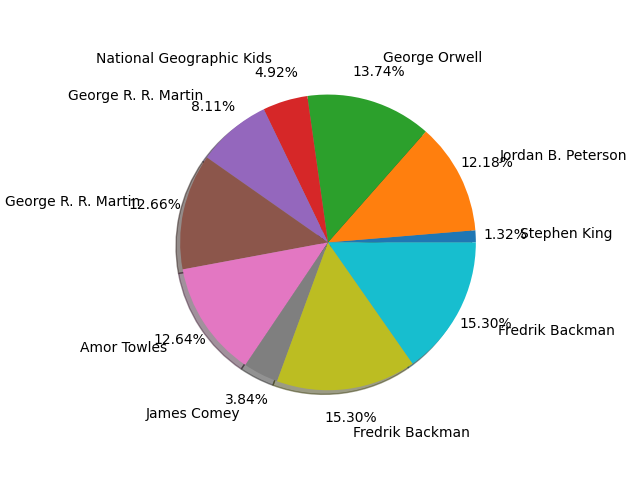

In [ ]:
plt.scatter(books.loc[20:60, 'reviews'], books.loc[20:60, 'user_rating'])
plt.xlabel('Reviews', color = 'b', fontsize = 15)
plt.ylabel('User Rating', color = 'r', fontsize = 15)

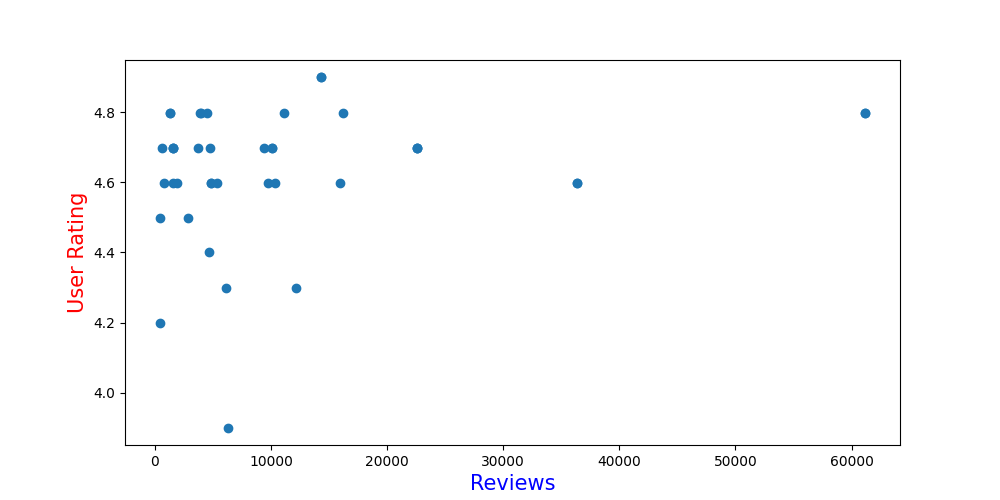

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(books.loc[1:10, 'author'], books.loc[1:10, 'user_rating'])

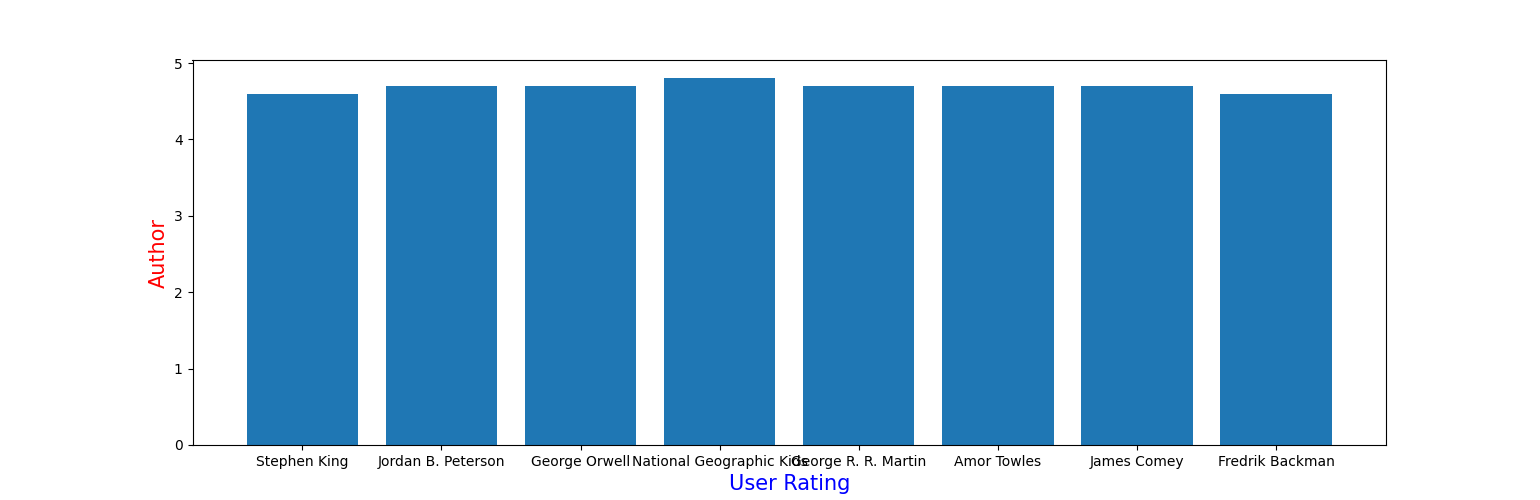